In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
d221 = pd.read_csv("./pyring/t1/GW150914_PROD1_Kerr_221_0M/Nested_sampler/posterior.dat",sep=' ')
d221.columns = [d221.columns[(i+1)%len(d221.columns)] for i in range(len(d221.columns))]
d221 = d221.drop(columns='#')

In [4]:
d220 = pd.read_csv("./pyring/t2-220/GW150914_PROD1_Kerr_220_0M/Nested_sampler/posterior.dat",sep=' ')
d220.columns = [d220.columns[(i+1)%len(d220.columns)] for i in range(len(d220.columns))]
d220 = d220.drop(columns='#')

In [5]:
d221

psi         Mf        af   cosiota    A2220_1    A2220_2  \
0      0.077279  87.901819  0.901389 -0.283842  34.405815  13.571231   
1      0.718684  52.815935  0.216653 -0.236272  27.917913  32.546161   
2      0.359984  78.312866  0.660995 -0.619173  37.614324   4.374274   
3      0.410738  70.392786  0.588129 -0.210656  41.460341   7.073865   
4      2.567113  86.312187  0.763675 -0.325109  21.781356  13.597464   
...         ...        ...       ...       ...        ...        ...   
11746  3.098159  69.828397  0.669223 -0.733573  47.097983  10.455491   
11747  1.114151  76.542439  0.791006 -0.719365  23.106120   9.295474   
11748  0.501789  71.004587  0.672766 -0.393461  14.893725  18.574909   
11749  0.911802  75.437095  0.774501 -0.107038   1.928424  24.337708   
11750  2.412152  73.938578  0.756238 -0.693182  38.464272  11.359968   

         A2221_1    A2221_2  phi2220_1  phi2220_2  phi2221_1  phi2221_2  \
0      12.155639   0.868654   5.800510   2.891680   1.236086   3.917747   
1      46.880096  25.775058   2.106267   2.693647   2.140105   5.850114   
2      37.012387   8.236135   2.398203   2.486415   1.380287   3.538785   
3      44.584363  27.434443   1.485696   3.820858   0.015526   6.192904   
4      36.231076   6.168049   2.135197   3.522516   1.804932   1.058227   
...          ...        ...        ...        ...        ...        ...   
11746  24.816851  14.346998   2.468142   4.280067   1.282195   1.566035   
11747   3.473257  12.864051   0.215267   2.132666   2.574467   5.822677   
11748  41.163350  26.416567   3.034698   3.061604   0.500159   0.247771   
11749   7.224688  33.785979   1.260646   2.435374   5.364193   5.990902   
11750  14.137606  14.130232   4.766919   5.840111   0.911386   3.183693   

               logL  logPrior  
0      38762.440340       0.0  
1      38762.523070       0.0  
2      38763.223646       0.0  
3      38763.683551       0.0  
4      38763.846697       0.0  
...             ...       ...  
11746  38779.060569       0.0  
11747  38779.079351       0.0  
11748  38779.084495       0.0  
11749  38779.093636       0.0  
11750  38779.156149       0.0  

[11751 rows x 14 columns]

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


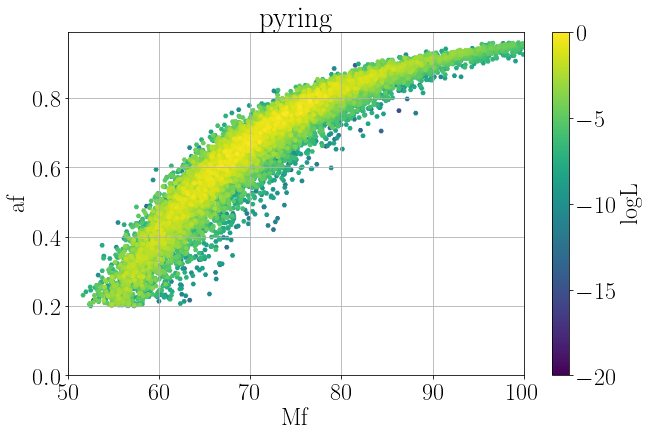

In [21]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(d221['Mf'],d221['af'],c=d221['logL']-np.max(d221['logL']), alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'logL')
cs.set_clim(-20,0)
ax.set_xlabel('Mf')
ax.set_ylabel('af')
ax.set_xlim(50,100)
ax.set_ylim(0,0.99)
ax.set_title('pyring')
fig.savefig('./figs/pyring_narrow.png',bbox_inches='tight')

In [26]:
d221_pycbc = h5py.File('./srate1024220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_0MS-1126259200-400.hdf','r')

In [27]:
arg = np.argsort(d221_pycbc['samples']['loglikelihood'])

In [29]:
arg

array([15473, 68129, 24026, ..., 72686, 42233, 63460])

In [32]:
d221_pycbc['samples']['final_mass'][:]

array([64.03216036, 63.79671049, 65.94502054, ..., 67.25770576,
       78.84673891, 71.86992517])

In [31]:
d221_pycbc['samples']['final_mass'][:][arg]

array([111.37394901, 105.79271144,  88.29832616, ...,  68.41683475,
        67.00338304,  67.00338304])

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


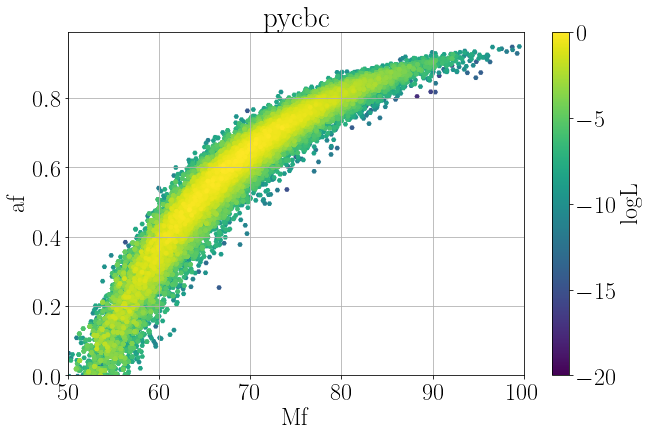

In [34]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(d221_pycbc['samples']['final_mass'][:][arg],d221_pycbc['samples']['final_spin'][:][arg],\
                c=d221_pycbc['samples']['loglikelihood'][:][arg]-np.max(d221_pycbc['samples']['loglikelihood']), alpha=1,marker='H',s=28,cmap='viridis', edgecolors='None')
cbar = fig.colorbar(cs,label=r'logL')
cs.set_clim(-20,0)
ax.set_xlabel('Mf')
ax.set_ylabel('af')
ax.set_xlim(50,100)
ax.set_ylim(0,0.99)
ax.set_title('pycbc')
fig.savefig('./figs/pycbc_narrow_sorted.png',bbox_inches='tight')

In [6]:
d221

psi         Mf        af   cosiota    A2220_1    A2220_2  \
0      0.077279  87.901819  0.901389 -0.283842  34.405815  13.571231   
1      0.718684  52.815935  0.216653 -0.236272  27.917913  32.546161   
2      0.359984  78.312866  0.660995 -0.619173  37.614324   4.374274   
3      0.410738  70.392786  0.588129 -0.210656  41.460341   7.073865   
4      2.567113  86.312187  0.763675 -0.325109  21.781356  13.597464   
...         ...        ...       ...       ...        ...        ...   
11746  3.098159  69.828397  0.669223 -0.733573  47.097983  10.455491   
11747  1.114151  76.542439  0.791006 -0.719365  23.106120   9.295474   
11748  0.501789  71.004587  0.672766 -0.393461  14.893725  18.574909   
11749  0.911802  75.437095  0.774501 -0.107038   1.928424  24.337708   
11750  2.412152  73.938578  0.756238 -0.693182  38.464272  11.359968   

         A2221_1    A2221_2  phi2220_1  phi2220_2  phi2221_1  phi2221_2  \
0      12.155639   0.868654   5.800510   2.891680   1.236086   3.917747   
1      46.880096  25.775058   2.106267   2.693647   2.140105   5.850114   
2      37.012387   8.236135   2.398203   2.486415   1.380287   3.538785   
3      44.584363  27.434443   1.485696   3.820858   0.015526   6.192904   
4      36.231076   6.168049   2.135197   3.522516   1.804932   1.058227   
...          ...        ...        ...        ...        ...        ...   
11746  24.816851  14.346998   2.468142   4.280067   1.282195   1.566035   
11747   3.473257  12.864051   0.215267   2.132666   2.574467   5.822677   
11748  41.163350  26.416567   3.034698   3.061604   0.500159   0.247771   
11749   7.224688  33.785979   1.260646   2.435374   5.364193   5.990902   
11750  14.137606  14.130232   4.766919   5.840111   0.911386   3.183693   

               logL  logPrior  
0      38762.440340       0.0  
1      38762.523070       0.0  
2      38763.223646       0.0  
3      38763.683551       0.0  
4      38763.846697       0.0  
...             ...       ...  
11746  38779.060569       0.0  
11747  38779.079351       0.0  
11748  38779.084495       0.0  
11749  38779.093636       0.0  
11750  38779.156149       0.0  

[11751 rows x 14 columns]

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


Text(0.5, 1.0, 'pyring')

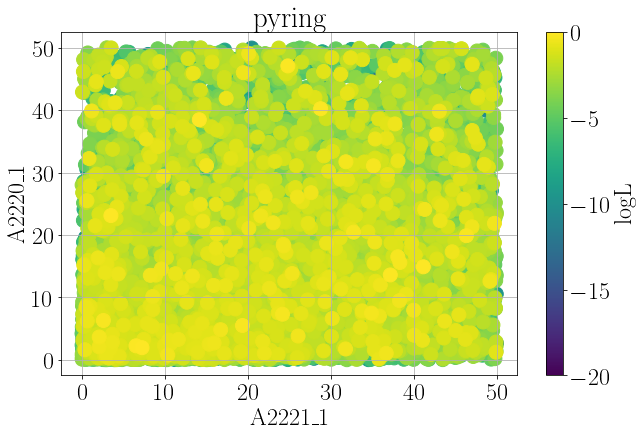

In [5]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

cs = ax.scatter(d221['A2221_1'],d221['A2220_1'],c=d221['logL']-np.max(d221['logL']),cmap='viridis')
cbar = fig.colorbar(cs,label=r'logL')
cs.set_clim(-20,0)
ax.set_xlabel('A2221_1')
ax.set_ylabel('A2220_1')
#ax.set_xlim(50,100)
#ax.set_ylim(0,0.99)
ax.set_title('pyring')
#fig.savefig('./figs/pyring_narrow.png',bbox_inches='tight')

In [9]:
evi_221 = pd.read_csv("./pyring/t1/GW150914_PROD1_Kerr_221_0M/Nested_sampler/Evidence.txt",sep='\t')

In [10]:
evi_221

lnZ_noise    lnZ_signal        lnB    Estimated_SNR 
0  38724.013136  38762.891448  38.878311        10.501715

In [11]:
evi_220 = pd.read_csv("./pyring/t2-220/GW150914_PROD1_Kerr_220_0M/Nested_sampler/Evidence.txt",sep='\t')

In [12]:
evi_220

lnZ_noise    lnZ_signal        lnB    Estimated_SNR 
0  38724.013136  38762.503688  38.490551        10.024245

In [15]:
evi_221[' lnB '] - evi_220[' lnB ']

0    0.38776
Name:  lnB , dtype: float64

In [35]:
from pycbc.inference import io, models

In [40]:
# load the posterior file
#fp = io.loadfile('./srate1024220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_0MS-1126259200-400.hdf', 'r')
# get the config, the data, and PSDs from the file
# the config file:
fp = io.loadfile('./srate1024220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914_0MS-1126259200-400.hdf','r')

cp = fp.read_config_file()
# the data
data = fp.read_data()
# the psds
psds = fp.read_psds()

In [41]:
# now let's load the model
model = models.read_from_config(cp, data=data, psds=psds)

# let's get the maximum likelihood point
samples = fp.read_samples(list(fp['samples'].keys()))
maxlidx = samples['loglikelihood'].argmax()
maxlparams = {p: samples[p][maxlidx] for p in model.variable_params}

In [42]:
# get the loglikelihood of these points
model.update(**maxlparams)
model.loglikelihood

-450387.3879366236

# 221 SNR

In [ ]:
# get the matched-filter SNR
print((2*model.loglr)**0.5)

# 220 SNR

In [43]:
# get the matched-filter SNR
print((2*model.loglr)**0.5)

12.07734076481152
